<a href="https://colab.research.google.com/github/rafaelrd-dev/Analise-Dados-Strava-Colab/blob/master/Analise_Strava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando dados do Strava

Tecnologias que obtem nossos dados já não são novidade. Eles podem medir nossos passos, nossa frequência cardíaca, nosso esforço. Com todos esses dados disponiveis, temos a oportunidade de criar diversas análises.

No ciclismo temos o [Strava](https://www.strava.com/), que é uma especie de rede social para aqueles que queiram armazenar os dados de suas corridas e pedais.

Nesse breve texto descrevo como desenvolvi uma análise dos dados obtidos do Strava utilizando Python no Google Colab.

Já escrevi outro texto analisando as minhas pedaladas que você pode ver [aqui!](https://medium.com/@rafael.dourado/analisando-minhas-pedaladas-com-python-postgresql-e-o-power-bi-3505ed17d12b)

Essa análise segue o modelo de uma outra análsie feita pela Cientista de Dados Linda Farczadi e você pode conferir a análise completa [aqui!](https://medium.com/epfl-extension-school/using-the-strava-api-and-python-d93d480490ef)

Primeiramente é necessario configurar o acesso a API do Strava em [https://www.strava.com/developers](https://labs.strava.com). Depois de registrar o aplicativo, você encontrará três informações importantes: Client ID, Client Secret e Token

<center><img src="https://raw.githubusercontent.com/rafaelrd-dev/Analise-Dados-Strava-Colab/master/Imagens/Anotação%202019-10-01%20161910.png"></center>

Voltando a análise, agora é necessario instalar o [*stravalib*](https://pypi.org/project/stravalib/)



In [0]:
pip install stravalib

In [0]:
# importar pacotes necessários até então

from stravalib.client import Client
import pandas as pd

Podemos então passar o token de acesso e criar uma nova instancia do Client

In [0]:
# instanciando a classe Client do Strava

client = Client(access_token="ceb2fa8c02d036e6ab5a6fb47c9b188260948aed")

Nesse exemplo usaremos apenas dados correspondentes às atividades, sendo assim usaremos o *get_activities()* que é um método do objeto Client

In [0]:
activities = client.get_activities(limit=1000)
activities

<BatchedResultsIterator entity=Activity>

Transformando a estrutura do objeto *activities* numa lista podemos observar todos os atributos disponiveis.

In [0]:
# Obtendo lista de todos os atributos do objeto.
sample = list(activities)[0]
sample.to_dict()

{'achievement_count': 0,
 'athlete': {'admin': None,
  'agreed_to_terms': None,
  'approve_followers': None,
  'athlete_type': None,
  'badge_type_id': None,
  'bikes': None,
  'city': None,
  'clubs': None,
  'country': None,
  'created_at': None,
  'date_preference': None,
  'dateofbirth': None,
  'description': None,
  'email': None,
  'email_facebook_twitter_friend_joins': None,
  'email_kom_lost': None,
  'email_language': None,
  'email_send_follower_notices': None,
  'facebook_sharing_enabled': None,
  'firstname': None,
  'follower': None,
  'follower_count': None,
  'follower_request_count': None,
  'friend': None,
  'friend_count': None,
  'ftp': None,
  'global_privacy': None,
  'instagram_username': None,
  'lastname': None,
  'max_heartrate': None,
  'measurement_preference': None,
  'membership': None,
  'mutual_friend_count': None,
  'offer_in_app_payment': None,
  'owner': None,
  'plan': None,
  'premium': None,
  'premium_expiration_date': None,
  'profile': None,
  '

Dentre todos os atributos disponiveis irei utilizar os seguintes:

* **average_speed:** velocidade média
* **average_watts:** potencia média
* **distance:** distancia
* **elapsed_time:** tempo do percurso
* **total_elevation_gain:** total de ganho de elevação
* **type:** tipo de esporte (Ride/Run)
* **start_date_local:** data hora do evento

In [0]:
my_cols =['average_speed',
          'average_watts', 
          'distance',
          'elapsed_time',
          'total_elevation_gain',
          'type', 
          'start_date_local']

Agora vou armazenar os dados que estou interessado

In [0]:
data = []
for activity in activities:
    my_dict = activity.to_dict()
    data.append([my_dict.get(x) for x in my_cols])

In [0]:
# agora podemos converter essa lista num dataframe usando o pandas
df = pd.DataFrame(data, columns=my_cols)

## Limpeza dos Dados

É necessario nesse momento realizar a limpeza dos dados. Inicialmente é necessario realizar uma previa dos dados.

In [0]:
df.head ()

,average_speed,average_watts,distance,elapsed_time,total_elevation_gain,type,start_date_local
0,5.757,217.3,5141.4,0:20:44,86.3,Ride,2019-10-01T07:28:19
1,5.293,180.4,3387.5,0:21:24,38.7,Ride,2019-09-25T17:43:46
2,5.241,182.4,5278.0,0:25:52,90.2,Ride,2019-09-25T07:19:48
3,4.708,158.0,4759.4,0:20:14,67.9,Ride,2019-09-24T17:38:29
4,5.491,185.8,5156.2,0:21:17,86.0,Ride,2019-09-24T07:13:31


In [0]:
# visualizando o index e a quantidade de linhas
df.index

RangeIndex(start=0, stop=248, step=1)

Com o comando colums é possivel visualizar os rotulos das colunas

In [0]:
df.columns

Index(['average_speed', 'average_watts', 'distance', 'elapsed_time',
       'total_elevation_gain', 'type', 'start_date_local'],
      dtype='object')

Com o comando shape é possivel obter a quantidade de linhas e colunas

In [0]:
df.shape

(248, 7)

Com o método *info* podemos verificar os tipos de dados de cada coluna, assim como o numero de valores ausentes.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
average_speed           248 non-null float64
average_watts           234 non-null float64
distance                248 non-null float64
elapsed_time            248 non-null object
total_elevation_gain    248 non-null float64
type                    248 non-null object
start_date_local        248 non-null object
dtypes: float64(4), object(3)
memory usage: 13.6+ KB


Para as colunas numéricas, obtemos facilmente algumas estatísticas resumidas usando o método *DataFrame.describe()*

In [0]:
df.describe()

,average_speed,average_watts,distance,total_elevation_gain
count,248.000000,234.000000,248.000000,248.000000
mean,5.036940,158.026496,18175.939113,255.241129
std,1.162987,35.978953,25451.563495,382.777039
min,1.214000,56.900000,1295.700000,0.000000
25%,4.705750,143.725000,4850.975000,67.875000
50%,5.030000,164.350000,5336.300000,84.500000
75%,5.399500,182.150000,19149.625000,244.950000
max,18.255000,243.300000,151993.000000,2267.800000


In [0]:
# Nas variaveis categoricas, podemos observar os tipos de variaveis que temos, nesse caso possuo 241 pedaladas e 6 corridas
df['type'].value_counts()

Ride    242
Run       6
Name: type, dtype: int64

In [0]:
# Como eu quero analisar somente as pedaladas, irei recriar o dataframe sem as corridas
df = df [df ['type']. isin (['Ride'])]

In [0]:
# utilizando novamene o comando *value_counts()* observamos que possuimos somente valores de pedaladas
df['type'].value_counts()

Ride    242
Name: type, dtype: int64

In [0]:
# Possuimos alguns valores ausentes como em *average_watts*, iremos substituir esses valores por zero
df.loc[df['type']=='Run', 'average_watts'] = 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 247
Data columns (total 7 columns):
average_speed           242 non-null float64
average_watts           234 non-null float64
distance                242 non-null float64
elapsed_time            242 non-null object
total_elevation_gain    242 non-null float64
type                    242 non-null object
start_date_local        242 non-null object
dtypes: float64(4), object(3)
memory usage: 15.1+ KB


In [0]:
# Temos alguns valores de media de potecia, decidi remover esses dados. (Esses dados são das pedaladas que foram criadas manualmente)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 245
Data columns (total 7 columns):
average_speed           234 non-null float64
average_watts           234 non-null float64
distance                234 non-null float64
elapsed_time            234 non-null object
total_elevation_gain    234 non-null float64
type                    234 non-null object
start_date_local        234 non-null object
dtypes: float64(4), object(3)
memory usage: 14.6+ KB


In [0]:
# Agora irei transformar a distancia em quilometros e a velocidade media em quilometros / hora e arredondar os valores resultantes em duas casas decimais

df['distance'] = df['distance']/1000
df['distance'] = df['distance'].round(2)
df['average_speed'] = df['average_speed'] * 18/5
df['average_speed']  = df['average_speed'].round(2)

In [0]:
df['elapsed_time'].str.len().value_counts()

7    231
8      3
Name: elapsed_time, dtype: int64

In [0]:
df[df['elapsed_time'].str.len() == 7]['elapsed_time']

0      0:20:44
1      0:21:24
2      0:25:52
3      0:20:14
4      0:21:17
5      0:18:47
6      0:19:08
7      0:45:04
8      0:19:06
9      0:26:53
10     0:21:18
11     0:21:34
12     0:22:54
13     0:21:07
14     0:19:08
15     0:22:05
16     0:21:14
17     0:21:50
18     0:20:22
19     0:20:39
20     0:16:30
21     0:22:26
22     0:21:01
23     0:24:07
24     0:16:09
25     0:21:52
26     0:19:25
27     0:23:36
28     0:54:23
29     0:27:34
        ...   
215    4:03:29
216    1:01:45
217    4:26:33
218    0:44:56
219    0:52:36
220    5:35:59
221    1:29:46
222    7:33:26
223    4:30:27
224    1:32:15
225    2:09:15
226    4:16:33
227    1:29:01
228    0:35:10
229    0:58:02
230    1:04:38
231    0:39:48
232    4:01:30
233    1:15:41
234    2:36:07
235    1:58:22
237    0:43:40
238    3:04:07
239    3:24:28
240    0:51:18
241    4:20:33
242    0:38:24
243    0:54:41
244    1:23:19
245    0:59:05
Name: elapsed_time, Length: 231, dtype: object

In [0]:
def get_minutes(time_str):
    
    h, m, s = time_str.split(':') 
    total_min = int(h)*60+int(m)+int(s)/60
    return int(total_min)

In [0]:
df['time_min'] = df['elapsed_time'].apply(get_minutes)

In [0]:
# deletando a coluna original

df.drop('elapsed_time', axis=1, inplace=True)
df.head()

,average_speed,average_watts,distance,total_elevation_gain,type,start_date_local,time_min
0,20.73,217.3,5.14,86.3,Ride,2019-10-01T07:28:19,20
1,19.05,180.4,3.39,38.7,Ride,2019-09-25T17:43:46,21
2,18.87,182.4,5.28,90.2,Ride,2019-09-25T07:19:48,25
3,16.95,158.0,4.76,67.9,Ride,2019-09-24T17:38:29,20
4,19.77,185.8,5.16,86.0,Ride,2019-09-24T07:13:31,21


In [0]:
# Convertento a data de start em datetime

df['start_date_local'] = pd.to_datetime(df['start_date_local'])

In [0]:
# Definindo essa nova coluna como Index

df.set_index('start_date_local', inplace=True)
df.head()

,average_speed,average_watts,distance,total_elevation_gain,type,time_min
start_date_local,,,,,,
2019-10-01 07:28:19,20.73,217.3,5.14,86.3,Ride,20
2019-09-25 17:43:46,19.05,180.4,3.39,38.7,Ride,21
2019-09-25 07:19:48,18.87,182.4,5.28,90.2,Ride,25
2019-09-24 17:38:29,16.95,158.0,4.76,67.9,Ride,20
2019-09-24 07:13:31,19.77,185.8,5.16,86.0,Ride,21


In [0]:
df.index = df.index.round('D')
df.index.rename('date', inplace=True)
df.head()

,average_speed,average_watts,distance,total_elevation_gain,type,time_min
date,,,,,,
2019-10-01,20.73,217.3,5.14,86.3,Ride,20
2019-09-26,19.05,180.4,3.39,38.7,Ride,21
2019-09-25,18.87,182.4,5.28,90.2,Ride,25
2019-09-25,16.95,158.0,4.76,67.9,Ride,20
2019-09-24,19.77,185.8,5.16,86.0,Ride,21


In [0]:
grouped = df.groupby('type')

In [0]:
def f(group):
    return (group-group.mean()).abs().div(group.std())

In [0]:
grouped.transform(f).head()

,average_speed,average_watts,distance,total_elevation_gain,time_min
date,,,,,
2019-10-01,0.567243,1.647449,0.523261,0.463353,0.527105
2019-09-26,0.163143,0.621850,0.590526,0.585287,0.519013
2019-09-25,0.119846,0.677438,0.517879,0.453363,0.486646
2019-09-25,0.341982,0.000736,0.537867,0.510487,0.527105
2019-09-24,0.336329,0.771938,0.522492,0.464121,0.519013


In [0]:
# Removendo valores 3 vezes acima da media
outliers = grouped.transform(f) > 3
df = df[~outliers.any(axis=1)]

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 224 entries, 2019-10-01 to 2015-07-09
Data columns (total 6 columns):
average_speed           224 non-null float64
average_watts           224 non-null float64
distance                224 non-null float64
total_elevation_gain    224 non-null float64
type                    224 non-null object
time_min                224 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 12.2+ KB


## Analise Exploratoria

In [0]:
# importando dependencias
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns

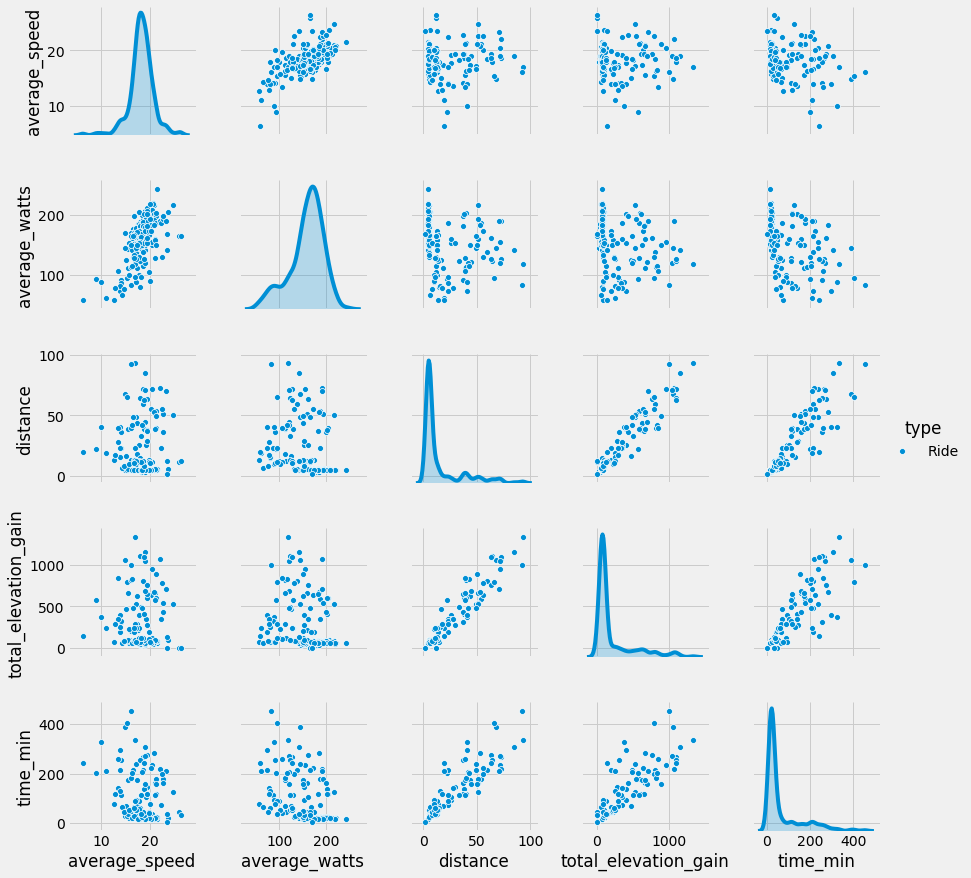

In [0]:
# Estou utilizando o pairplot para visualizar histogramas e graficos de dispersão, com isso podemos verificar a distribuição ds valores de cada variavel e a relação entre cada variavel.
sns.pairplot(df, hue='type')

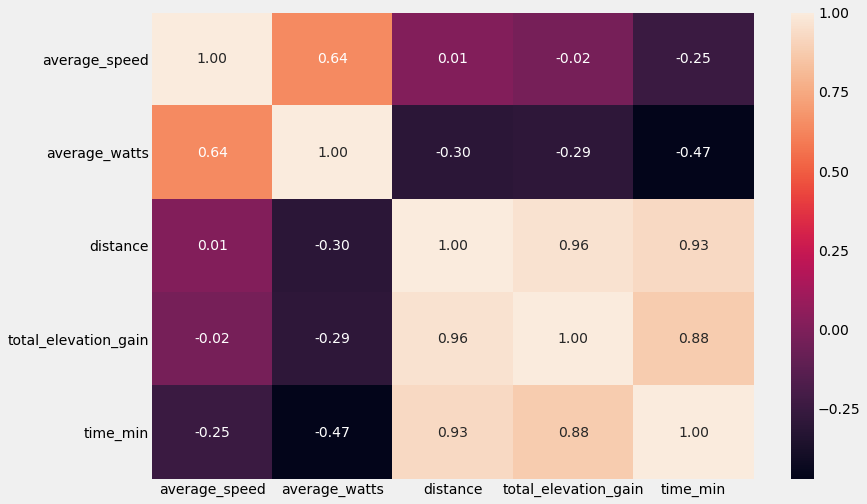

In [0]:
# Outro grafico util é o grafico de correlação. Para isso, estou utilizando o DataFrame.corr(), que é um método do Pandas que calcula a correlação entre cada par de colunas numericas. E em seguida estou usando o sns.heatmap() que é um método do Seaborn que vai plotar esses valores

corr = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

In [0]:
trends = df.copy()

In [0]:
trends.set_index(pd.to_datetime(trends.index), drop=True, inplace=True)

In [0]:
trends['weekday'] = trends.index.map(lambda x: x.weekday)

In [0]:
trends.groupby('weekday').mean()

,average_speed,average_watts,distance,total_elevation_gain,time_min
weekday,,,,,
0,19.032800,160.960000,20.549600,316.916000,79.680000
1,18.348649,163.200000,11.194595,146.867568,47.162162
2,18.787576,169.078788,7.925455,111.393939,30.424242
3,18.293056,164.938889,10.714722,144.522222,47.416667
4,18.585263,172.839474,10.599474,159.105263,41.868421
5,18.227576,151.884848,22.556970,313.496970,89.515152
6,16.003182,106.809091,36.508636,465.981818,207.545455


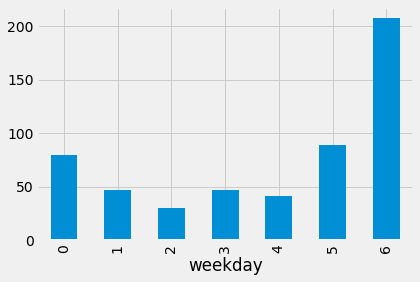

In [0]:
trends.groupby('weekday').mean()['time_min'].plot(kind='bar')

In [0]:
import calendar
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Text(0.5, 1.0, 'Average training time by day of the week')

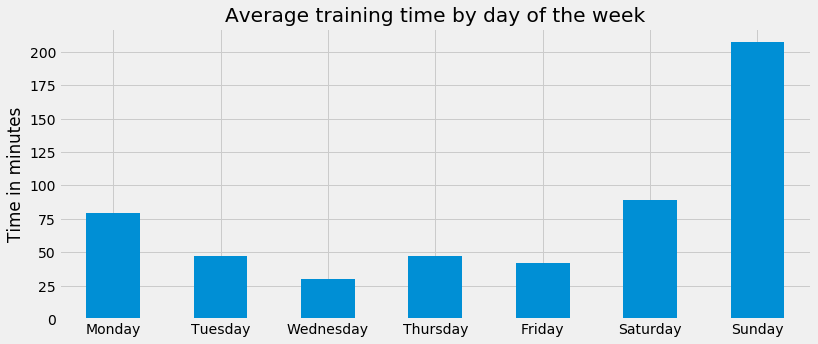

In [0]:
trends.groupby('weekday').mean()['time_min'].plot(kind='bar', figsize=(12,5));
plt.xticks(list(range(7)), list(calendar.day_name), rotation='horizontal');
plt.xlabel('')
plt.ylabel('Time in minutes')
plt.title('Average training time by day of the week')

In [0]:
trends['year'] = trends.index.map(lambda x: x.year)

In [0]:
grouped = trends.groupby(['year', 'type']).mean()
grouped

,,average_speed,average_watts,distance,total_elevation_gain,time_min,weekday
year,type,,,,,,
2015,Ride,16.371176,107.947059,32.546275,468.525490,161.352941,4.000000
2016,Ride,21.473158,178.715789,41.120000,476.189474,154.052632,2.947368
2017,Ride,17.597500,160.725000,16.237500,248.700000,62.750000,2.250000
2018,Ride,19.265000,161.841667,9.105000,126.841667,32.500000,2.750000
2019,Ride,18.468043,174.085507,6.595725,97.242754,27.260870,2.594203


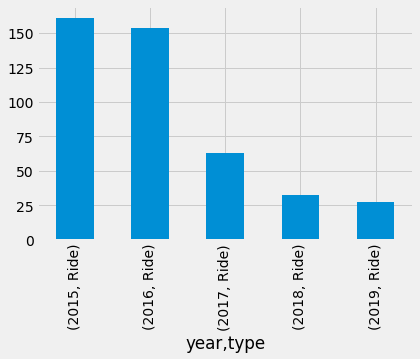

In [0]:
grouped['time_min'].plot(kind='bar');

In [0]:
grouped['time_min'].unstack('type')

type,Ride
year,
2015,161.352941
2016,154.052632
2017,62.750000
2018,32.500000
2019,27.260870


In [0]:
result = grouped['time_min'].unstack('type').fillna(0)

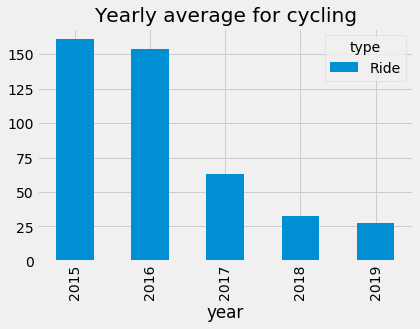

In [0]:
result.plot(kind='bar', stacked=True)
plt.title('Yearly average for cycling');

## Analise de Cluster

In [0]:
# Primeiramente separar somente os dados de ciclismo

df = df[df['type']=="Ride"]
df.drop(['type'], axis=1, inplace=True)
df.head()

,average_speed,average_watts,distance,total_elevation_gain,time_min
date,,,,,
2019-10-01,20.73,217.3,5.14,86.3,20
2019-09-26,19.05,180.4,3.39,38.7,21
2019-09-25,18.87,182.4,5.28,90.2,25
2019-09-25,16.95,158.0,4.76,67.9,20
2019-09-24,19.77,185.8,5.16,86.0,21


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


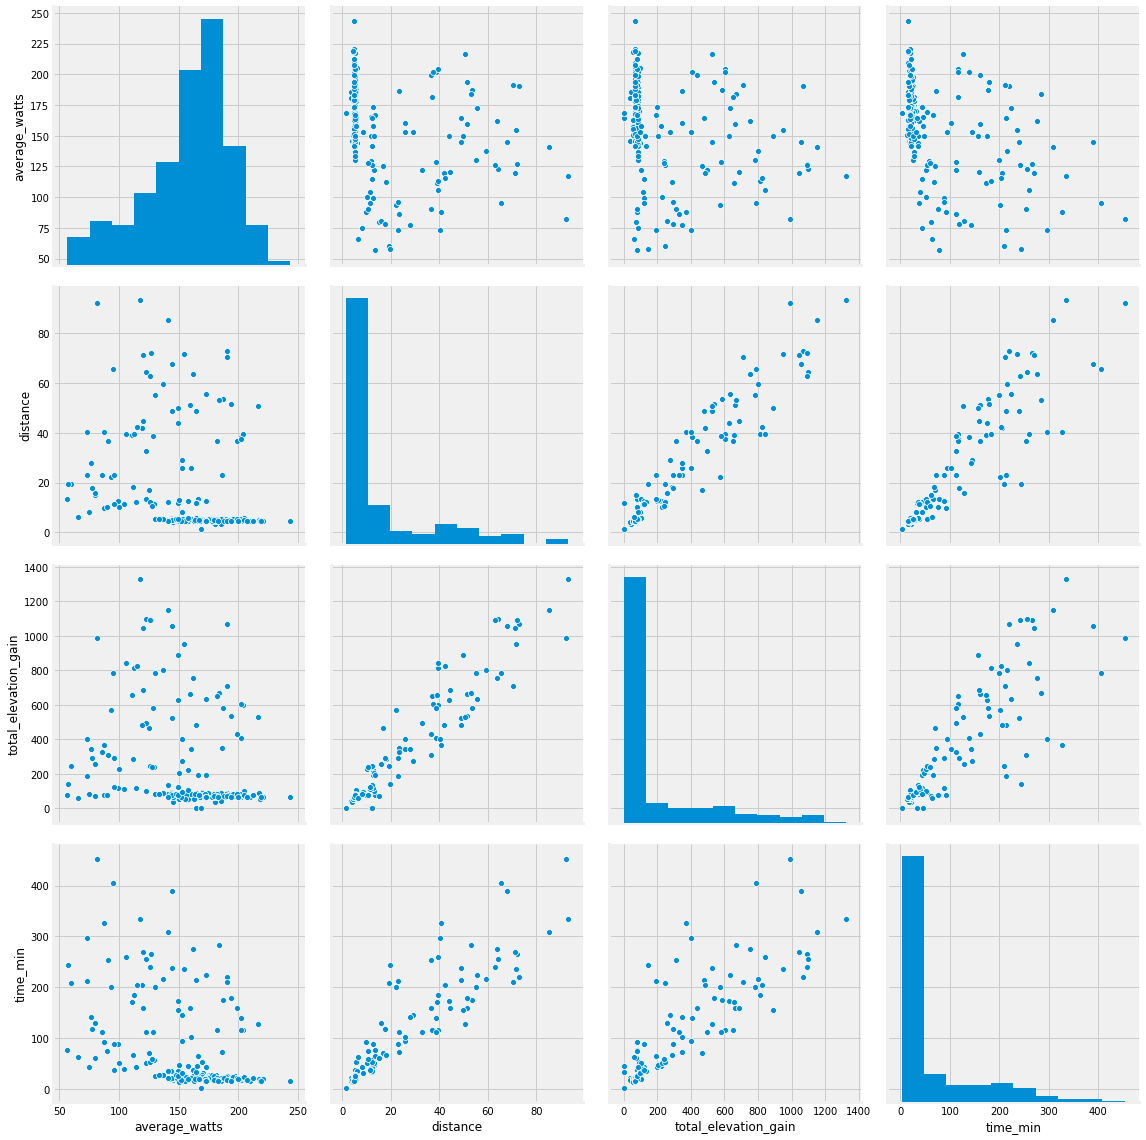

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
cols = ['average_watts', 'distance', 'total_elevation_gain', 'time_min' ]
sns.pairplot(x_vars=cols, y_vars=cols, data=df, size=5);

In [0]:
import sklearn
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df)

In [0]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(X)
df['Cluster'] = model.labels_

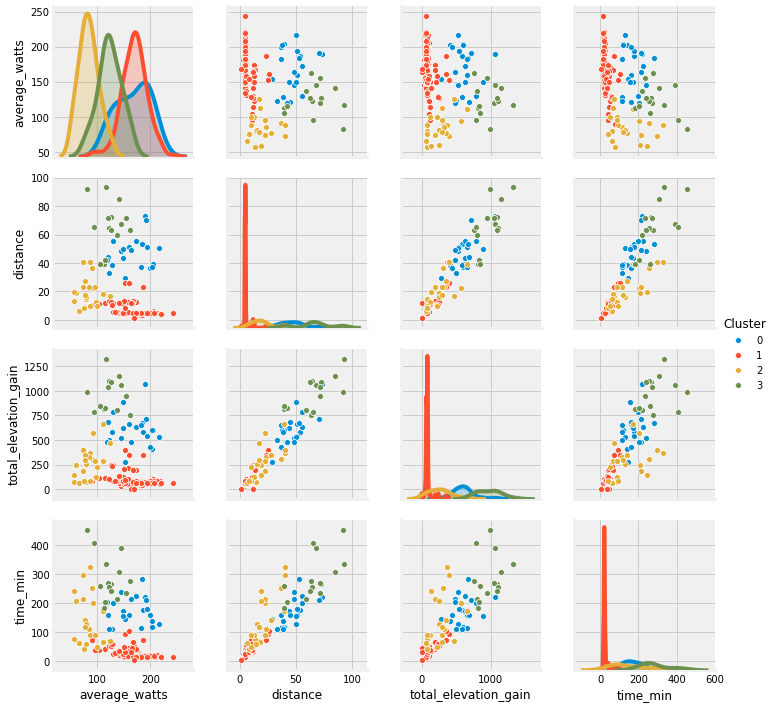

In [0]:
sns.pairplot(x_vars=cols, y_vars=cols, hue='Cluster', data=df);

In [0]:
df.groupby('Cluster').mean()

,average_speed,average_watts,distance,total_elevation_gain,time_min
Cluster,,,,,
0,20.356087,168.126087,46.994348,605.034783,171.608696
1,18.640976,170.206098,6.076463,88.201829,25.573171
2,13.955455,84.772727,20.830455,267.159091,141.772727
3,17.383333,124.266667,65.992000,974.693333,286.600000


In [0]:
df.groupby('Cluster').std()

,average_speed,average_watts,distance,total_elevation_gain,time_min
Cluster,,,,,
0,2.127317,30.669369,10.801592,163.769202,46.752481
1,1.720802,23.729071,3.371084,51.093037,13.261902
2,2.940179,17.908768,10.336947,162.994317,84.532288
3,1.950405,21.563483,16.733767,166.837464,77.774215
